In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
X = dataset.iloc[:, 3:5].values

In [26]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(X)

In [52]:

from sklearn.cluster import HDBSCAN
hdb = HDBSCAN(min_cluster_size=9)
y_hdbscan=hdb.fit_predict(scaled_data)

In [53]:
y_hdbscan

array([-1, -1, -1,  2, -1,  2,  0, -1,  0,  2,  0, -1,  0,  2,  0,  2, -1,
        2, -1, -1, -1,  2,  0,  2,  0,  2,  2, -1,  2, -1,  0,  2, -1, -1,
        0,  2, -1, -1,  0, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  1,  2,  1,  2,  1,  3,  1,  3,  1,  2,  1,  3,  1,
        3,  1,  3,  1,  3,  1,  2,  1,  3,  1, -1,  1,  3,  1,  3,  1,  3,
        1,  3,  1,  3,  1,  3,  1, -1,  1,  3,  1,  3,  1,  3,  1, -1, -1,
        3,  1,  3,  1,  3,  1,  3,  1, -1,  1, -1, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [54]:
supervised=dataset

In [55]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),hdbscanCluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [56]:
supervised['hdbscanCluster_group']=y_hdbscan

In [57]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),hdbscanCluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [58]:
supervised.to_csv("cluster.csv",index=False)

In [59]:
supervised['hdbscanCluster_group'].value_counts()

hdbscanCluster_group
 2    98
-1    43
 1    28
 3    21
 0    10
Name: count, dtype: int64

In [60]:
supervised.columns[3]

'Annual Income (k$)'

In [61]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'hdbscanCluster_group'],
      dtype='object')

C:\Anaconda3.12.v\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


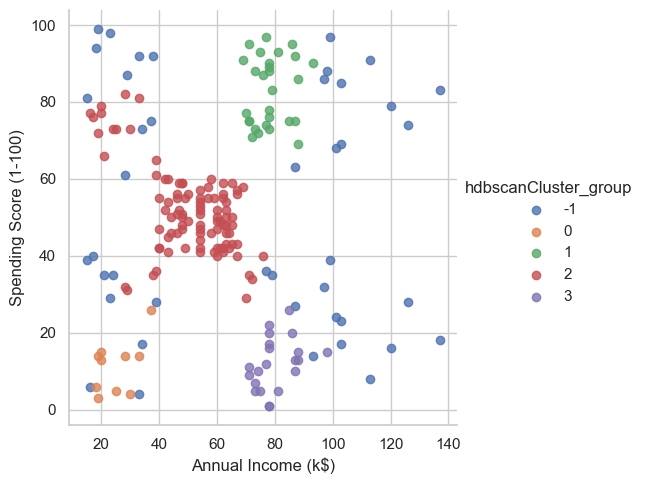

In [62]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)